In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import os

In [ ]:
df= pd.read_csv('diabetes_health_indicator.csv')

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
print(df.keys())

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()


,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


## EDA

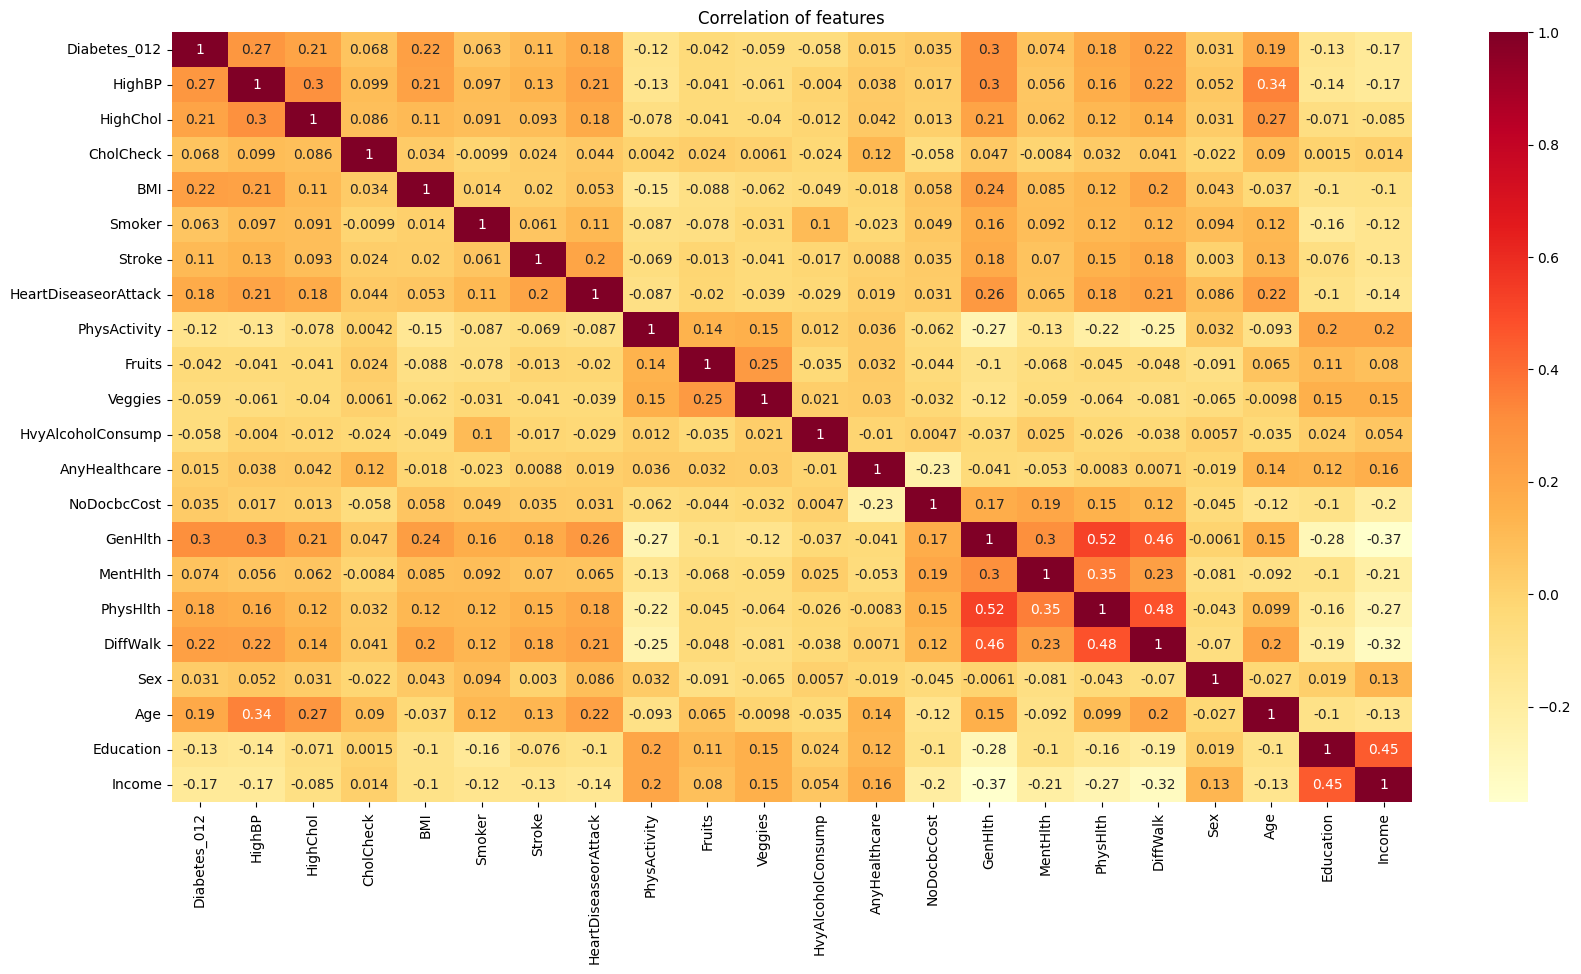

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.title('Correlation of features')
plt.show()

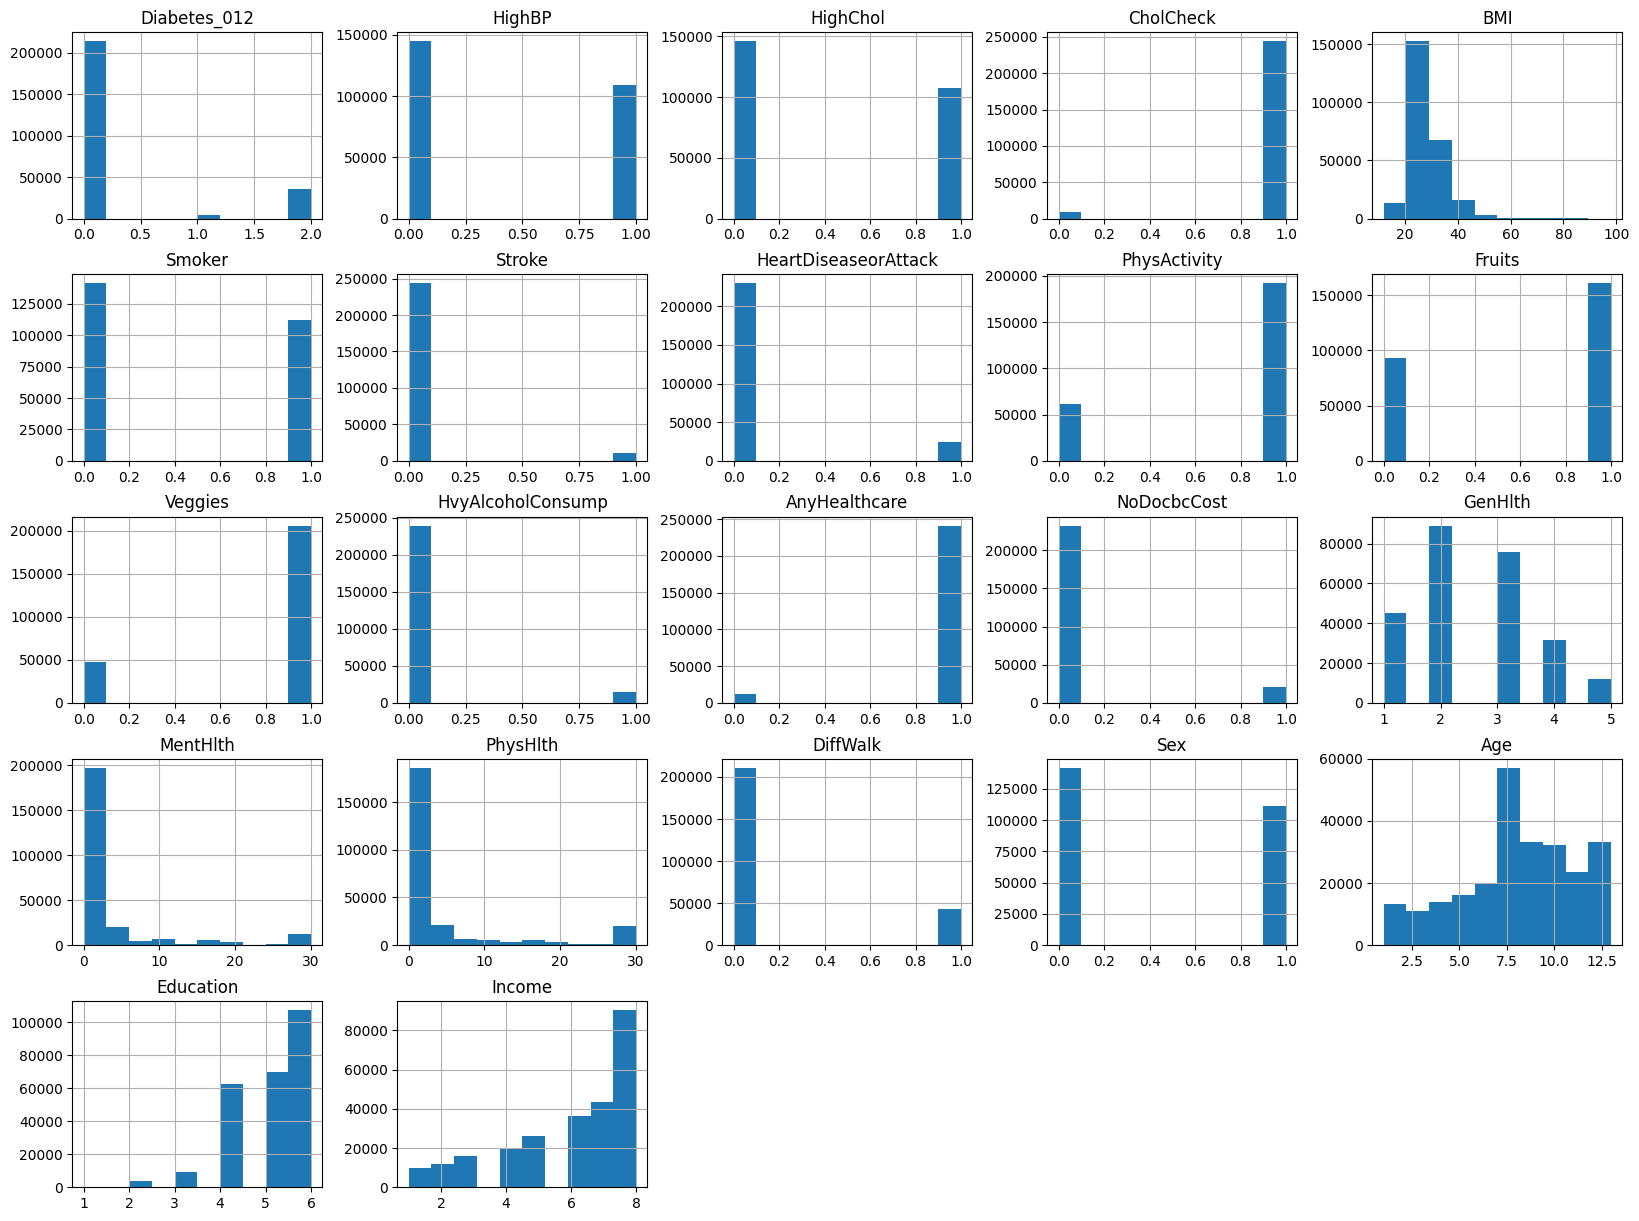

In [ ]:
df.hist(figsize=(20,15));

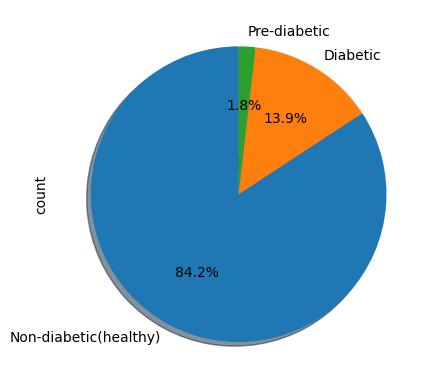

In [ ]:
labels='Non-diabetic(healthy)','Diabetic','Pre-diabetic'
df.Diabetes_012.value_counts().plot.pie(labels=labels,autopct='%1.1f%%',shadow=True,startangle=90);

## Handling the missing values

In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
df_features=df.drop("Diabetes_012",axis=1)
df_target=df["Diabetes_012"]

In [ ]:
df_target.value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


## Handling Imbalanced Datasets

In [ ]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']



In [ ]:
categorical_features = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost']
categorical_indices = [df.columns.get_loc(col) for col in categorical_features]


from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

## Normalizing the numerical features

In [ ]:
# Identify categorical and numerical columns
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                       'HvyAlcoholConsump', 'AnyHealthcare', 'Sex', 'Education', 'Income']
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age']

In [ ]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Normalize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)
print("\nVerifying normalization:")
print("Means of preprocessed data:", X_preprocessed.mean(axis=0))
print("Standard deviations:", X_preprocessed.std(axis=0))


Verifying normalization:
Means of preprocessed data: [-8.56610938e-17  3.31819355e-14  1.85799215e-14 -6.29629850e-15
  2.00702252e-14  3.22237528e-15  5.70998896e-01  4.29001104e-01
  5.75879060e-01  4.24120940e-01  3.73304951e-02  9.62669505e-01
  5.56831441e-01  4.43168559e-01  9.59429202e-01  4.05707979e-02
  9.05814412e-01  9.41855881e-02  2.43456323e-01  7.56543677e-01
  3.65744245e-01  6.34255755e-01  1.88580101e-01  8.11419899e-01
  9.43803217e-01  5.61967833e-02  4.89474929e-02  9.51052507e-01
  5.59657837e-01  4.40342163e-01  6.85903500e-04  1.59374015e-02
  3.73620309e-02  2.47358877e-01  2.75583412e-01  4.23072375e-01
  3.86747083e-02  4.64482813e-02  6.30479344e-02  7.93716493e-02
  1.02030117e-01  1.43763797e-01  1.70368180e-01  3.56295333e-01]
Standard deviations: [1.         1.         1.         1.         1.         1.
 0.49493349 0.49493349 0.49420883 0.49420883 0.18957038 0.18957038
 0.49675969 0.49675969 0.19729371 0.19729371 0.29208674 0.29208674
 0.4291682  0.42

## Train test split (with internal One-Hot Encoding)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
import pandas as pd

# Assuming df is your DataFrame and 'Diabetes_012' is the target column
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Define categorical features
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost']

# Get the indices of the categorical features
categorical_indices = [df.columns.get_loc(col) for col in categorical_features]

# Define dataset sizes for cross-validation
dataset_sizes = [100000, 150000]

# Number of random train-test splits for cross-validation
n_splits = 5

# Initialize SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

if not os.path.exists("splits"):
    os.makedirs("splits")

# Perform cross-validation for each dataset size
for size in dataset_sizes:
    for split_num in range(1, n_splits + 1):  # Loop for multiple splits
        # Randomly sample the dataset to the specified size
        X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=size, random_state=42)

        # Split the sampled data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

        # Apply SMOTENC to the training data only
        X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

        # Convert to DataFrame for saving
        train_resampled_df = pd.DataFrame(X_train_res, columns=X.columns)
        test_df = pd.DataFrame(X_test, columns=X.columns)

        # Performing normalization on numerical features (on every train-test split)
        scaler = StandardScaler()
        # Fit scaler on training numerical columns then transform both train and test
        train_resampled_df[numerical_columns] = scaler.fit_transform(train_resampled_df[numerical_columns])
        test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

        # Apply one-hot encoding **inside** the loop for the train and test splits
        train_resampled_df['Diabetes_0'] = (y_train_res == 0).astype(int)
        train_resampled_df['Diabetes_1'] = (y_train_res == 1).astype(int)
        train_resampled_df['Diabetes_2'] = (y_train_res == 2).astype(int)

        test_df['Diabetes_0'] = (y_test == 0).astype(int)
        test_df['Diabetes_1'] = (y_test == 1).astype(int)
        test_df['Diabetes_2'] = (y_test == 2).astype(int)

        # Drop original target column after encoding
        train_resampled_df.drop(columns=['Diabetes_012'], inplace=True, errors='ignore')
        test_df.drop(columns=['Diabetes_012'], inplace=True, errors='ignore')

        # Save to CSV
        train_filename = f"train_size_{size}_split_{split_num}.csv"
        test_filename = f"test_size_{size}_split_{split_num}.csv"
        train_resampled_df.to_csv(os.path.join("splits", train_filename), index=False)
        test_df.to_csv(os.path.join("splits", test_filename), index=False)

        print(f"Saved: {train_filename} and {test_filename}")
        print(f"Dataset Size: {size}, Split {split_num}")
        print("Class distribution after SMOTENC:")
        print(pd.Series(y_train_res).value_counts())
        print("\n")

Saved: train_size_100000_split_1.csv and test_size_100000_split_1.csv
Dataset Size: 100000, Split 1
Class distribution after SMOTENC:
Diabetes_012
1.0    67273
2.0    67273
0.0    67273
Name: count, dtype: int64


Saved: train_size_100000_split_2.csv and test_size_100000_split_2.csv
Dataset Size: 100000, Split 2
Class distribution after SMOTENC:
Diabetes_012
1.0    67273
2.0    67273
0.0    67273
Name: count, dtype: int64


Saved: train_size_100000_split_3.csv and test_size_100000_split_3.csv
Dataset Size: 100000, Split 3
Class distribution after SMOTENC:
Diabetes_012
1.0    67273
2.0    67273
0.0    67273
Name: count, dtype: int64


Saved: train_size_100000_split_4.csv and test_size_100000_split_4.csv
Dataset Size: 100000, Split 4
Class distribution after SMOTENC:
Diabetes_012
1.0    67273
2.0    67273
0.0    67273
Name: count, dtype: int64


Saved: train_size_100000_split_5.csv and test_size_100000_split_5.csv
Dataset Size: 100000, Split 5
Class distribution after SMOTENC:
Diabetes_0

In [ ]:
# Create a folder "pca_splits" to store PCA-transformed files
if not os.path.exists("pca_splits"):
    os.makedirs("pca_splits")

# Define target (one-hot encoded) columns
target_columns = ['Diabetes_0', 'Diabetes_1', 'Diabetes_2']

# For each dataset size, process the existing training splits
for size in dataset_sizes:
    # Load all training splits saved earlier (these are the files from the "splits" folder)
    train_splits = []
    for split_num in range(1, n_splits + 1):
        file_path = os.path.join("splits", f"train_size_{size}_split_{split_num}.csv")
        df_split = pd.read_csv(file_path)
        train_splits.append(df_split)

    # Perform k-fold cross validation: iterate so each fold is used as the validation set once
    for fold in range(n_splits):
        # Utilize Existing Splits & K-Fold CV:
        # Select the current fold as the validation set and combine the remaining splits as the training set.
        validation_df = train_splits[fold]
        training_dfs = [train_splits[i] for i in range(n_splits) if i != fold]
        training_df = pd.concat(training_dfs, ignore_index=True)

        # Separate feature columns from target columns.
        # Assume that any column not in the target_columns is a feature.
        feature_columns = [col for col in training_df.columns if col not in target_columns]

        # Apply PCA on Training Set:
        # Fit PCA (retaining 95% of variance) on the feature columns of the combined training set.
        pca = PCA(n_components=0.95)
        training_features = training_df[feature_columns]
        pca.fit(training_features)
        # Save the PCA weights (components) if needed:
        pca_weights = pca.components_

        # Transform Validation Set:
        # Use the fitted PCA to transform both the training and validation feature sets.
        training_pca = pca.transform(training_features)
        validation_features = validation_df[feature_columns]
        validation_pca = pca.transform(validation_features)

        # Create new DataFrames for the PCA-transformed data and add back the target columns.
        n_components = training_pca.shape[1]
        pca_columns = [f'PC{i+1}' for i in range(n_components)]
        training_pca_df = pd.DataFrame(training_pca, columns=pca_columns)
        validation_pca_df = pd.DataFrame(validation_pca, columns=pca_columns)
        # Add target columns from original data
        for target in target_columns:
            training_pca_df[target] = training_df[target].values
            validation_pca_df[target] = validation_df[target].values



        # Here, we use "split_{fold}" (with fold index starting at 1) in the file names.
        train_filename = f"train_size_{size}_split_{fold+1}.csv"
        test_filename = f"test_size_{size}_split_{fold+1}.csv"
        # Save these files in the "pca_splits" folder so that we do not overwrite the original splits.
        training_pca_df.to_csv(os.path.join("pca_splits", train_filename), index=False)
        validation_pca_df.to_csv(os.path.join("pca_splits", test_filename), index=False)
        # ---------------------------------------------------------------------

        print(f"PCA CV: Saved training file {train_filename} and validation file {test_filename} for dataset size {size}.")

PCA CV: Saved training file train_size_100000_split_1.csv and validation file test_size_100000_split_1.csv for dataset size 100000.
PCA CV: Saved training file train_size_100000_split_2.csv and validation file test_size_100000_split_2.csv for dataset size 100000.
PCA CV: Saved training file train_size_100000_split_3.csv and validation file test_size_100000_split_3.csv for dataset size 100000.
PCA CV: Saved training file train_size_100000_split_4.csv and validation file test_size_100000_split_4.csv for dataset size 100000.
PCA CV: Saved training file train_size_100000_split_5.csv and validation file test_size_100000_split_5.csv for dataset size 100000.
PCA CV: Saved training file train_size_150000_split_1.csv and validation file test_size_150000_split_1.csv for dataset size 150000.
PCA CV: Saved training file train_size_150000_split_2.csv and validation file test_size_150000_split_2.csv for dataset size 150000.
PCA CV: Saved training file train_size_150000_split_3.csv and validation fil

In [ ]:
# --- After fitting PCA on training_features ---
print("Shape of training features before PCA:", training_features.shape)
print("Shape of PCA components:", pca.components_.shape)
print(f"Cumulative explained variance ratio: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# --- After transforming training features ---
print("Shape of training PCA data:", training_pca.shape)

# --- After transforming validation features ---
print("Shape of validation features before PCA:", validation_features.shape)
print("Shape of validation PCA data:", validation_pca.shape)


Shape of training features before PCA: (1212132, 21)
Shape of PCA components: (12, 21)
Cumulative explained variance ratio: 95.33%
Shape of training PCA data: (1212132, 12)
Shape of validation features before PCA: (303033, 21)
Shape of validation PCA data: (303033, 12)


# **Logistic** **Regression**

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Define evaluation metrics function
def evaluate_model(y_true, y_pred, model_name, dataset_size, split_num):
    metrics = {
        'Model': model_name,
        'Dataset Size': dataset_size,
        'Split': split_num,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

    # Class-specific metrics for binary classification
    if len(np.unique(y_true)) == 2:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        metrics.update({
            'Sensitivity (TPR)': tp / (tp + fn),
            'Specificity (TNR)': tn / (tn + fp),
            'Precision (Class 1)': precision_score(y_true, y_pred, pos_label=1),
            'Recall (Class 1)': recall_score(y_true, y_pred, pos_label=1)
        })

    return metrics

# Define hyperparameter grid for logistic regression
logreg_params = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear'],
    'logreg__max_iter': [1000]
}

# Define dataset sizes and number of splits
dataset_sizes = [100000, 150000]
n_splits = 5

# Initialize results storage
results = []

# Perform logistic regression for each dataset size and split
for size in dataset_sizes:
    for split_num in range(1, n_splits + 1):
        print(f"\nProcessing dataset size {size}, split {split_num}")

        # Load the data
        train_file = os.path.join("pca_splits", f"train_size_{size}_split_{split_num}.csv")
        test_file = os.path.join("pca_splits", f"test_size_{size}_split_{split_num}.csv")

        train_df = pd.read_csv(train_file)
        test_df = pd.read_csv(test_file)

        # Separate features and targets
        pca_columns = [col for col in train_df.columns if col.startswith('PC')]
        target_columns = ['Diabetes_0', 'Diabetes_1', 'Diabetes_2']

        X_train = train_df[pca_columns]
        X_test = test_df[pca_columns]

        # Model 1: Non-diabetic (0) vs (Pre-diabetic or Diabetic) (1 or 2)
        print("\nTraining Model 1: Non-diabetic vs (Pre-diabetic or Diabetic)")

        # Create binary targets
        y_train_model1 = np.where((train_df['Diabetes_1'] == 1) | (train_df['Diabetes_2'] == 1), 1, 0)
        y_test_model1 = np.where((test_df['Diabetes_1'] == 1) | (test_df['Diabetes_2'] == 1), 1, 0)

        # Create pipeline with StandardScaler and LogisticRegression
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('logreg', LogisticRegression())
        ])

        # Grid search for hyperparameter tuning
        grid_model1 = GridSearchCV(pipe, logreg_params, cv=3, scoring='f1_weighted', n_jobs=-1)
        grid_model1.fit(X_train, y_train_model1)

        # Get best model and predictions
        best_model1 = grid_model1.best_estimator_
        y_pred_model1 = best_model1.predict(X_test)

        # Evaluate
        model1_metrics = evaluate_model(y_test_model1, y_pred_model1,
                                      "LogReg_Model1", size, split_num)
        results.append(model1_metrics)

        print(f"Best params for Model 1: {grid_model1.best_params_}")
        print(classification_report(y_test_model1, y_pred_model1))

        # Model 2: Pre-diabetic (1) vs Diabetic (2) - only for samples that are not non-diabetic
        print("\nTraining Model 2: Pre-diabetic vs Diabetic")

        # Filter samples that are either pre-diabetic or diabetic
        train_mask = (train_df['Diabetes_1'] == 1) | (train_df['Diabetes_2'] == 1)
        test_mask = (test_df['Diabetes_1'] == 1) | (test_df['Diabetes_2'] == 1)

        X_train_model2 = X_train[train_mask]
        X_test_model2 = X_test[test_mask]

        # Create binary targets (1 for pre-diabetic, 0 for diabetic)
        y_train_model2 = np.where(train_df.loc[train_mask, 'Diabetes_1'] == 1, 1, 0)
        y_test_model2 = np.where(test_df.loc[test_mask, 'Diabetes_1'] == 1, 1, 0)

        # Skip if not enough samples
        if len(np.unique(y_train_model2)) < 2 or len(np.unique(y_test_model2)) < 2:
            print(f"Skipping Model 2 for size {size}, split {split_num} - not enough samples")
            continue

        # Grid search for hyperparameter tuning
        grid_model2 = GridSearchCV(pipe, logreg_params, cv=3, scoring='f1_weighted', n_jobs=-1)
        grid_model2.fit(X_train_model2, y_train_model2)

        # Get best model and predictions
        best_model2 = grid_model2.best_estimator_
        y_pred_model2 = best_model2.predict(X_test_model2)

        # Evaluate
        model2_metrics = evaluate_model(y_test_model2, y_pred_model2,
                                       "LogReg_Model2", size, split_num)
        results.append(model2_metrics)

        print(f"Best params for Model 2: {grid_model2.best_params_}")
        print(classification_report(y_test_model2, y_pred_model2))

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_file = "logistic_regression_results.csv"
results_df.to_csv(results_file, index=False)
print(f"\nSaved results to {results_file}")

# Print summary statistics
print("\nSummary Statistics:")
print(results_df.groupby(['Model', 'Dataset Size'])[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean())


Processing dataset size 100000, split 1

Training Model 1: Non-diabetic vs (Pre-diabetic or Diabetic)
Best params for Model 1: {'logreg__C': 1, 'logreg__max_iter': 1000, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.71      0.52      0.61     67273
           1       0.79      0.90      0.84    134546

    accuracy                           0.77    201819
   macro avg       0.75      0.71      0.72    201819
weighted avg       0.77      0.77      0.76    201819


Training Model 2: Pre-diabetic vs Diabetic
Best params for Model 2: {'logreg__C': 0.001, 'logreg__max_iter': 1000, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.62      0.63      0.62     67273
           1       0.62      0.61      0.62     67273

    accuracy                           0.62    134546
   macro avg       0.62      0.62      0.62    134546
we